In [1]:
import pandas as pd
from sqlalchemy import create_engine
from utils import connection

In [2]:
# get credentials for olap schema
host, database, user, password = connection.mysql_params('olap')

In [3]:
engine = create_engine(f"mysql://{user}:{password}@{host}:3306/{database}")
conn = engine.connect()

In [4]:
query ="""
    SELECT 
        User_ID,
        Name,
        Email_Address,
        Username,
        Date_of_Birth,
        Gender,
        Location,
        Membership_Start_Date,
        Membership_End_Date,
        YEAR(Membership_Start_Date) AS year,
        QUARTER(Membership_Start_Date) AS quarter,
        MONTH(Membership_Start_Date) AS month,
        DAY(Membership_Start_Date) AS day,
        Subscription_Plan,
        Payment_Information,
        Renewal_Status,
        Usage_Frequency,
        Purchase_History,
        Favorite_Genres,
        Devices_Used,
        Engagement_Metrics,
        Feedback_Ratings,
        Customer_Support_Interactions
    FROM prime_users
"""

In [5]:
prime = pd.read_sql(sql=query, con=conn)
prime.head(3)

,User_ID,Name,Email_Address,Username,Date_of_Birth,Gender,Location,Membership_Start_Date,Membership_End_Date,year,...,Subscription_Plan,Payment_Information,Renewal_Status,Usage_Frequency,Purchase_History,Favorite_Genres,Devices_Used,Engagement_Metrics,Feedback_Ratings,Customer_Support_Interactions
0,29,Shelley Lopez,rodneyroberts@example.com,rodneyroberts,1967-07-05,Female,North Marymouth,2024-01-07,2025-01-06,2024,...,Annual,Mastercard,Auto-renew,Regular,Clothing,Comedy,Smartphone,High,48,7
1,34,Whitney Underwood,ujones@example.com,ujones,2002-07-23,Female,New Jenniferport,2024-03-30,2025-03-30,2024,...,Annual,Mastercard,Auto-renew,Regular,Electronics,Horror,Smartphone,Low,45,10
2,46,Geoffrey Garcia,benjamin76@example.org,benjamin76,1993-10-31,Male,Jamesview,2024-02-03,2025-02-02,2024,...,Annual,Mastercard,Auto-renew,Regular,Clothing,Sci-Fi,Smart TV,Medium,39,5


### Exploratory Data Analysis

In [6]:
prime.shape

(2500, 23)

We verify the data

In [7]:
prime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   User_ID                        2500 non-null   int64         
 1   Name                           2500 non-null   object        
 2   Email_Address                  2500 non-null   object        
 3   Username                       2500 non-null   object        
 4   Date_of_Birth                  2500 non-null   datetime64[ns]
 5   Gender                         2500 non-null   object        
 6   Location                       2500 non-null   object        
 7   Membership_Start_Date          2500 non-null   datetime64[ns]
 8   Membership_End_Date            2500 non-null   datetime64[ns]
 9   year                           2500 non-null   int64         
 10  quarter                        2500 non-null   int64         
 11  month            

In [11]:
# We evaluate values for numeric fields. There are 11 values for the number of customer support interactions from 0 to 11
prime['Customer_Support_Interactions'].value_counts()

Customer_Support_Interactions
1     241
0     238
10    236
5     232
2     231
4     225
8     225
6     222
7     218
9     217
3     215
Name: count, dtype: int64

In [9]:
prime[['Feedback_Ratings', 'Customer_Support_Interactions']].describe()

,Feedback_Ratings,Customer_Support_Interactions
count,2500.000000,2500.000000
mean,40.047600,4.951600
std,5.807687,3.191572
min,30.000000,0.000000
25%,35.000000,2.000000
50%,40.000000,5.000000
75%,45.000000,8.000000
max,50.000000,10.000000


From above we see that the maximum value for feedbak ratings is 50 and that only 25% of the users gave a rating greater than 45, but since the mean is 40 we can say that the users are 

In [17]:
prime[['Feedback_Ratings', 'Customer_Support_Interactions']].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])

,Feedback_Ratings,Customer_Support_Interactions
count,2500.000000,2500.000000
mean,40.047600,4.951600
std,5.807687,3.191572
min,30.000000,0.000000
10%,32.000000,1.000000
20%,34.000000,2.000000
30%,36.000000,3.000000
40%,38.000000,4.000000
50%,40.000000,5.000000
60%,42.000000,6.000000


As feedback ratings increase on the percentiles, so does the customer support interactions. Let's see if there's any correlation between those variables:

In [18]:
prime[['Feedback_Ratings', 'Customer_Support_Interactions']].corr()

,Feedback_Ratings,Customer_Support_Interactions
Feedback_Ratings,1.000000,0.008026
Customer_Support_Interactions,0.008026,1.000000


No correlation at all. Let's plot them to see them better:

In [20]:
import seaborn

<Axes: xlabel='Feedback_Ratings', ylabel='Customer_Support_Interactions'>

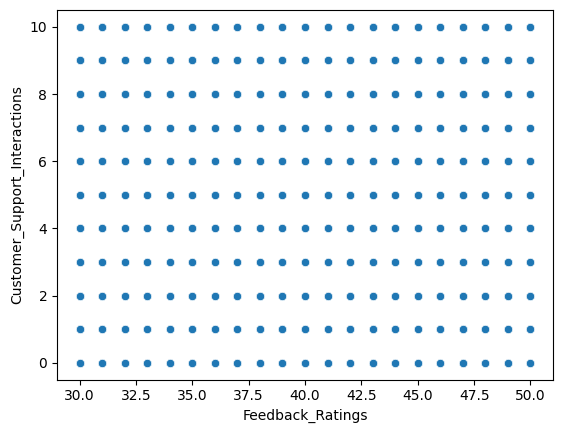

In [23]:
seaborn.scatterplot(data=prime, x='Feedback_Ratings', y='Customer_Support_Interactions')

So, it seems, that for every amount of customer support interactions the users have rated the whole array of feedback ratings.

### Other analysis

The dataset is equally distributed between men and women.

In [24]:
prime['Gender'].value_counts()

Gender
Male      1260
Female    1240
Name: count, dtype: int64

Around half of the users are subscribed monthly and annually as well.

In [25]:
prime['Subscription_Plan'].value_counts()

Subscription_Plan
Annual     1271
Monthly    1229
Name: count, dtype: int64

<Axes: xlabel='Favorite_Genres', ylabel='Customer_Support_Interactions'>

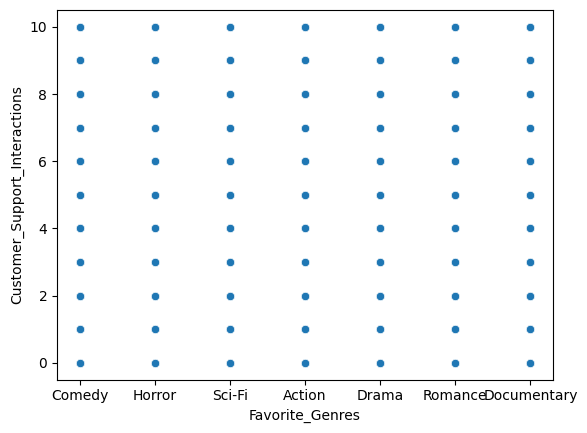

In [26]:
seaborn.scatterplot(data=prime, x='Favorite_Genres', y='Customer_Support_Interactions')